In [31]:
import yfinance as yf
import pandas as pd
from PIL import Image, ImageDraw
import pandas as pd

# Fetch Apple stock data
apple_stock = yf.Ticker("AAPL")
hist = apple_stock.history(start="2009-01-01", end="2019-12-31")

hist.reset_index(inplace=True)
hist['Date'] = hist['Date'].dt.strftime('%Y-%m-%d')

In [32]:
hist['20 Day MA'] = hist['Close'].rolling(window=20).mean()
hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
hist = hist.iloc[20:]

In [33]:
hist

,Date,Open,High,Low,Close,Volume,20 Day MA
20,2009-02-02,2.690351,2.777915,2.684311,2.763119,558247200,2.681686
21,2009-02-03,2.775501,2.819585,2.725982,2.807507,599309200,2.679270
22,2009-02-04,2.814754,2.906244,2.811130,2.824718,808421600,2.680070
23,2009-02-05,2.801167,2.936439,2.796637,2.912585,749246400,2.688298
24,2009-02-06,2.929493,3.019474,2.928890,3.011019,687209600,2.698897
...,...,...,...,...,...,...,...
2762,2019-12-23,68.145828,69.049484,68.106960,68.988754,98572000,65.875027
2763,2019-12-24,69.156350,69.204937,68.726388,69.054321,48478800,66.092438
2764,2019-12-26,69.187963,70.441422,69.158814,70.424416,93121200,66.403617
2765,2019-12-27,70.718328,71.410646,69.989574,70.397675,146266000,66.670341


In [34]:
AAPL1 = hist[0:60]  # change this to populate 

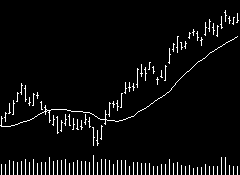

In [35]:
# Setup
bar_width = 3
spacing = 1
height_factor = 100  
volume_height = 20  
space_between_sections = 10  

# Calculate image dimensions
num_bars = len(AAPL1)
image_width = num_bars * (bar_width + spacing)
max_price = AAPL1[['Open', 'High', 'Low', 'Close', '20 Day MA']].max().max()
min_price = AAPL1[['Open', 'High', 'Low', 'Close', '20 Day MA']].min().min()
max_volume = AAPL1['Volume'].max()
volume_scale = volume_height / max_volume
image_height = int((max_price - min_price) * height_factor) + volume_height + space_between_sections + 10

# Create a blank image and get drawing context
image_black_bg = Image.new("RGB", (image_width, image_height), "black")
draw_black_bg = ImageDraw.Draw(image_black_bg)

# Reset index for AAPL1 to help with plotting
AAPL1 = AAPL1.reset_index(drop=True)

# Draw OHLC sticks and volume bars
for index, row in AAPL1.iterrows():
    open_px = int((row['Open'] - min_price) * height_factor)
    high_px = int((row['High'] - min_price) * height_factor)
    low_px = int((row['Low'] - min_price) * height_factor)
    close_px = int((row['Close'] - min_price) * height_factor)
    
    # Calculate positions
    x_position = index * (bar_width + spacing)
    open_y = image_height - open_px - volume_height - space_between_sections
    high_y = image_height - high_px - volume_height - space_between_sections
    low_y = image_height - low_px - volume_height - space_between_sections
    close_y = image_height - close_px - volume_height - space_between_sections
    
    # Draw high to low line
    draw_black_bg.line([(x_position + 1, high_y), (x_position + 1, low_y)], fill="white")
    
    # Draw open tick
    draw_black_bg.line([(x_position, open_y), (x_position + 1, open_y)], fill="white")
    
    # Draw close tick
    draw_black_bg.line([(x_position + 2, close_y), (x_position + 1, close_y)], fill="white")

    # Draw volume bar
    volume_height_px = int(row['Volume'] * volume_scale)
    volume_top = image_height - volume_height_px
    volume_bottom = image_height
    draw_black_bg.line([(x_position + 1, volume_top), (x_position + 1, volume_bottom)], fill="white")

# Draw 20-day moving average line
previous_ma_y = None
for index, row in AAPL1.iterrows():
    if pd.notna(row['20 Day MA']):  
        ma_y = image_height - int((row['20 Day MA'] - min_price) * height_factor) - volume_height - space_between_sections
        x_position = index * (bar_width + spacing) + 1
        if previous_ma_y is not None:
            draw_black_bg.line([(x_position - (bar_width + spacing), previous_ma_y), (x_position, ma_y)], fill="White")
        previous_ma_y = ma_y

image_black_bg  # Display the image